# Домашнее задание

Градиентный спуск и Momentum своими руками.

## Quiz

Найдите минимум функции вручную (на бумажке):

$f(x) = x^2 - 30x + 1$

В ответ запишите точку минимума, округленную до сотых.

Используем библиотеку sympy для того, чтобы вычислять производные различных функций (при помощи `sp.diff`).

Ниже реализован метод одномерного градиентного спуска для нахождения минимума функции `f(x)`.

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

x = sp.Symbol('x')

При помощи градиентного спуска найдем минимум функции
$f(x) = x^3 - 3x^2 + 4$.

In [2]:
def f(x):
  return x**3 - 3*x**2 + 4

In [3]:
def gradient_descent(x_start, learning_rate, epsilon, num_iterations):
    x_curr = x_start
    df_x = sp.diff(f(x)) # производная

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
      x_new = x_curr - learning_rate * df_x.subs(x, x_curr)
      trace.append(x_new)

      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace

      x_curr = x_new

    return x_curr, trace

Визуализируем процесс поиска минимума (красные точки) и найденный минимум (зеленая точка).

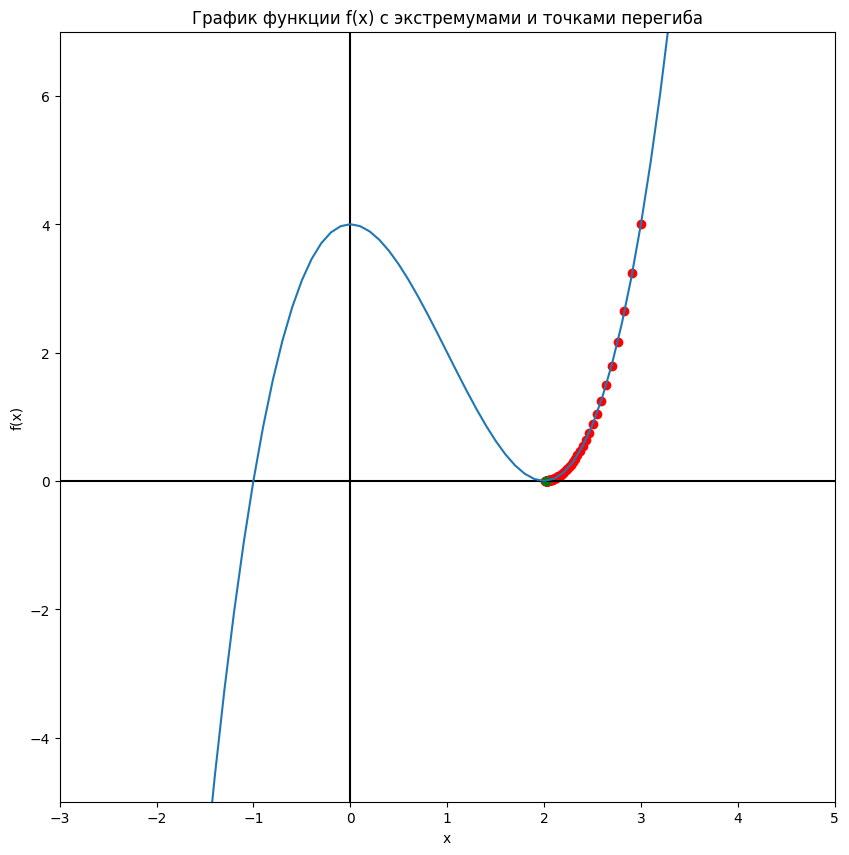

Метод остановился после 2.01599304738014 итераций.


In [4]:
xmin, trace = gradient_descent(3, 0.01, 0.001, 100)

x_values = [x for x in np.arange(-5, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show()
print(f"Метод остановился после {xmin} итераций.")

## Quiz

Запишите в ответ точку минимума, округленную до сотых.

In [ ]:
# ваш код здесь

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара:

* добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции)

* добавьте в возвращаемые значения метода число произведенных методом итераций

In [5]:
def gradient_descent_modified(x_start, learning_rate, epsilon, num_iterations, delta=1e-3):
    x_curr = x_start
    df_x = sp.diff(f(x))
    trace = [x_curr]  # Начинаем с начальной точки
    iteration_count = 0  # Счетчик итераций

    for i in range(num_iterations):
        iteration_count += 1
        derivative = df_x.subs(x, x_curr)

        # Критерий остановки 1: производная близка к нулю
        if abs(derivative) < epsilon:
            return x_curr, trace, iteration_count

        x_new = x_curr - learning_rate * derivative
        trace.append(x_new)  # Добавляем новую точку в траекторию

        # Критерий остановки 2: изменение x мало
        if abs(x_new - x_curr) < epsilon:
            return x_new, trace, iteration_count

        x_curr = x_new

    return x_curr, trace, iteration_count

## Quiz

Визуализируйте результат работы метода (как в коде выше) и с теми же гиперпараметрами.

Также выведите на экран число произведенных итераций.
Сколько итераций произвел метод до остановки?

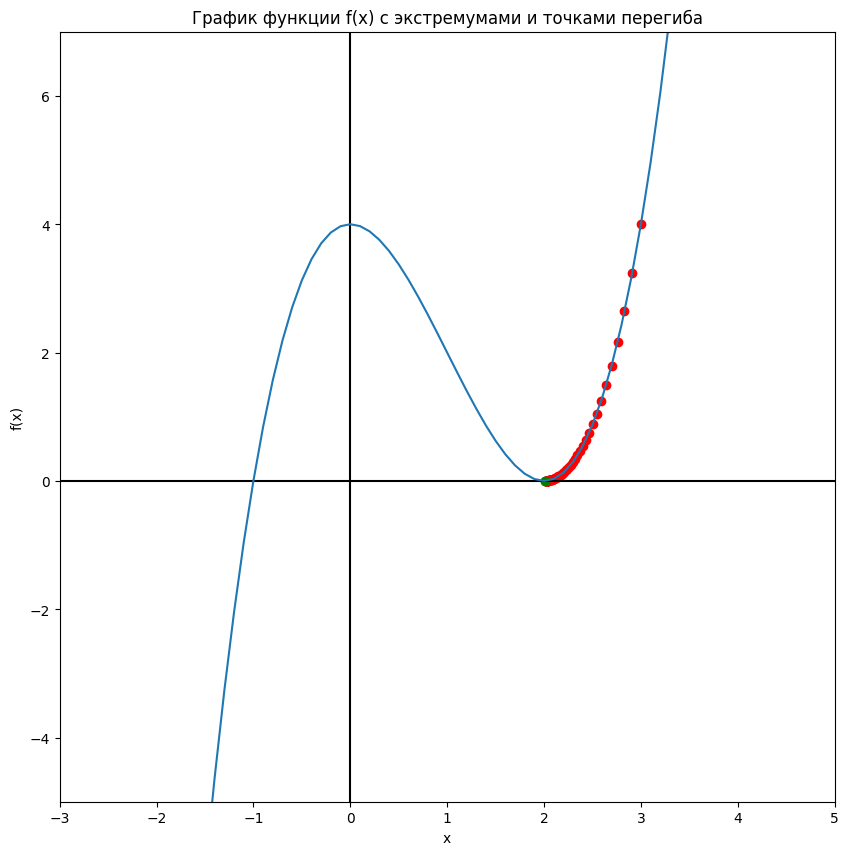

Метод остановился после 61 итераций.


In [6]:
xmin, trace, num_iter = gradient_descent_modified(3, 0.01, 0.001, 100)

x_values = [x for x in np.arange(-3, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show()

print(f"Метод остановился после {num_iter} итераций.")

## Quiz

При каком начальном приближении модифицированная функция с гиперпараметрами
* `learning_rate = 0.001`
* `epsilon = 0.001`
* `num_iterations = 100`
* `delta = 1e-3`

верно находит глобальный минимум функции
$f(x) = (x+5)*(x+2)*(x-3)*(x-4)$?

Варианты ответа:

a) -1

b) 1

c) 3

d) 7

In [18]:
def f(x):
  return (x+5)*(x+2)*(x-3)*(x-4)
  # ваш код здесь

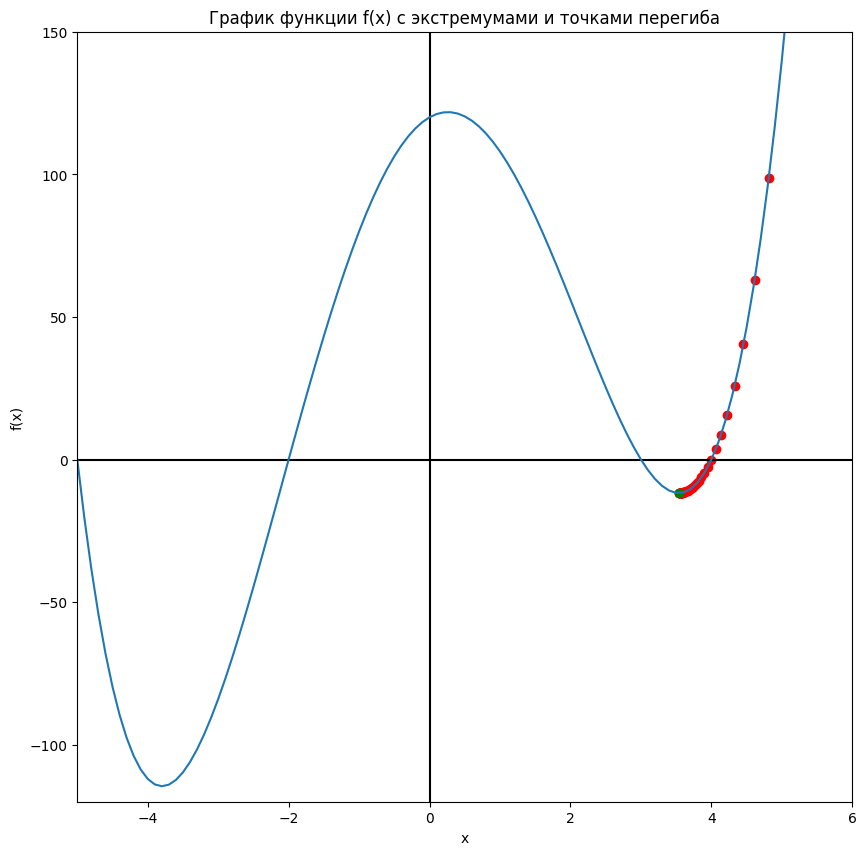

In [19]:
xmin, trace, num_iter = gradient_descent_modified(7,learning_rate=0.001, epsilon=0.001, num_iterations=100, delta=1e-3)

x_values = [x for x in np.arange(-5, 6, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-5, 6])
plt.ylim([-120, 150])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show()


Реализуйте модификацию метода градиентного спуска - Momentum:

$$x_{new} = x_{old} - h_{new},$$
$$h_{new} = \alpha\cdot h_{old} + \eta\cdot f'(x_{old})$$

В коде ниже
* $\eta$ обозначена как `learning_rate`
* $\alpha$ обозначена как `momentum`.

In [20]:
import sympy as sp

def momentum_method(x_start, learning_rate, epsilon, num_iterations, momentum, delta=0.01):
    x = sp.symbols('x')
    df_x = sp.diff(f(x))

    x_curr = x_start
    trace = [x_curr]

    h_curr = 0
    h_trace = [h_curr]

    for i in range(1, num_iterations):
        # Вычисляем градиент в текущей точке
        grad = df_x.subs(x, x_curr)

        # Обновляем момент
        h_new = momentum * h_curr + learning_rate * grad

        # Обновляем параметр
        x_new = x_curr - h_new

        trace.append(float(x_new))
        h_trace.append(float(h_new))

        # Проверка критериев остановки
        if (abs(x_new - x_curr)) < epsilon or abs(float(grad)) < delta:
            return trace[-1], trace, h_trace

        x_curr = x_new
        h_curr = h_new

    return trace[-1], trace, h_trace

Проверьте, решает ли Momentum проблему застревания в локальном минимуме?

Используйте гиперпараметры из запуска выше и возьмите
* `x_start = 7`
* `momentum = 0.2`

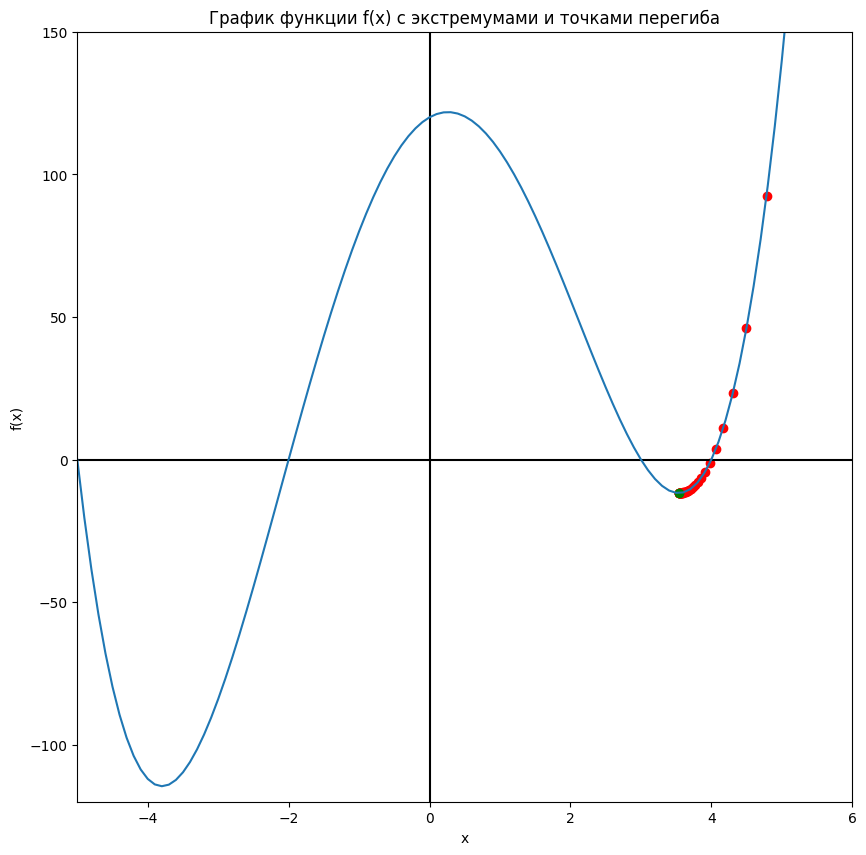

Метод остановился после 3.543487649344736 итераций.


In [22]:
xmin, trace, num_iter = momentum_method(x_start=7, learning_rate=0.001, epsilon=0.001, num_iterations=100, momentum=0.2, delta=0.01)

x_values = [x for x in np.arange(-5, 6, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-5, 6])
plt.ylim([-120, 150])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show()
print(f"Метод остановился после {xmin} итераций.")

## Quiz

Выведите на экран значение найденной точки минимума с заданными гиперпараметрами, округленное до сотых.

Теперь запустите метод с гиперпараметрами:

* `x_start = 7`
* `momentum = 0.8`.

Остальные значения гиперпараметров оставьте как и раньше.

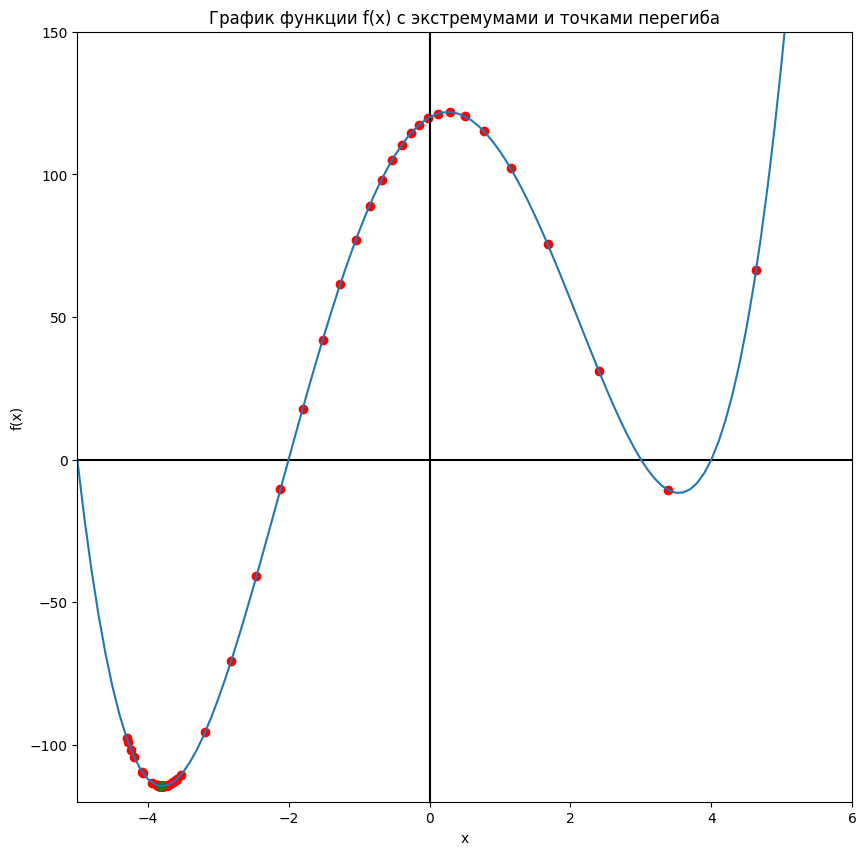

Метод остановился после -3.8073949955185507 итераций.


In [25]:
xmin, trace, num_iter = momentum_method(x_start=7, learning_rate=0.001, epsilon=0.001, num_iterations=100, momentum=0.8, delta=0.01)

x_values = [x for x in np.arange(-5, 6, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-5, 6])
plt.ylim([-120, 150])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show()
print(f"Метод остановился после {xmin} итераций.")